In [146]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly, units, Daily, Stations
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from pingouin import ttest
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [147]:
df_x = pd.read_csv('x_data.csv')
df_x = df_x.drop(columns = "Unnamed: 0")

df_y = pd.read_csv('y_data.csv')
df_y = df_y.drop(columns = "Unnamed: 0")

In [149]:
df_x.describe()

,Year,CO2(ppm),Temp
count,65.00000,65.000000,65.000000
mean,1918.00000,302.200308,8.401987
std,18.90767,6.432888,0.263350
min,1886.00000,291.330000,7.914917
25%,1902.00000,296.590000,8.178250
50%,1918.00000,302.400000,8.382250
75%,1934.00000,308.140000,8.628333
max,1950.00000,311.890000,8.863667


In [150]:
df_y.describe()

,Year,CO2(ppm),Temp
count,65.00000,65.000000,65.000000
mean,1983.00000,346.183077,8.986132
std,18.90767,26.937859,0.404574
min,1951.00000,312.160000,8.279583
25%,1967.00000,321.720000,8.658000
50%,1983.00000,341.585000,8.866583
75%,1999.00000,366.655000,9.324583
max,2015.00000,401.010000,9.831000


In [151]:
df_x_ppm = df_x["CO2(ppm)"]
df_y_ppm = df_y["CO2(ppm)"]
df_x_temp = df_x["Temp"]
df_y_temp = df_y["Temp"]
df_x_year = df_x["Year"]
df_y_year = df_y["Year"]

Correlation Coefficient = 0.8
R-Value = 0.8


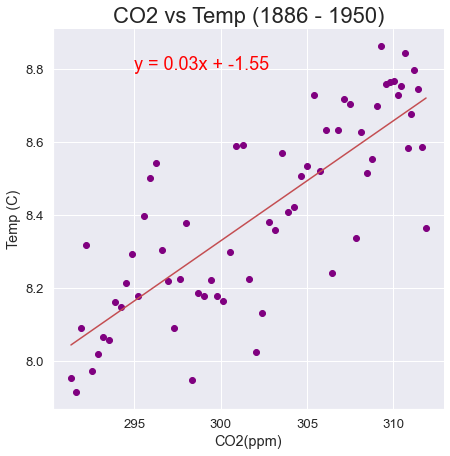

In [152]:
early_corr = round(st.pearsonr(df_x_ppm, df_x_temp)[0], 2)
n_early = st.linregress(df_x_ppm, df_x_temp)
print(f"Correlation Coefficient = {early_corr}\nR-Value = {round(n_early.rvalue,2)}")

line = n_early.slope * df_x_ppm + n_early.intercept
line_eq = f"y = {round(n_early.slope, 2)}x + {round(n_early.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(df_x_ppm, df_x_temp, marker="o", c= "purple")
plt.plot(df_x_ppm, line, "r-")
plt.title(f"CO2 vs Temp (1886 - 1950)", fontsize=22)
plt.xlabel("CO2(ppm)")
plt.ylabel("Temp (C)")
plt.grid(True)
plt.annotate(line_eq, (295,8.8), fontsize=18, color="red");

Correlation Coefficient = 0.9
R-Value = 0.9


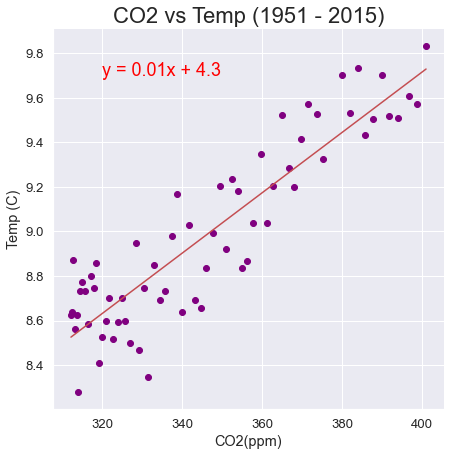

In [153]:
late_corr = round(st.pearsonr(df_y_ppm, df_y_temp)[0], 2)
n_late = st.linregress(df_y_ppm, df_y_temp)
print(f"Correlation Coefficient = {late_corr}\nR-Value = {round(n_late.rvalue,2)}")

line = n_late.slope * df_y_ppm + n_late.intercept
line_eq = f"y = {round(n_late.slope, 2)}x + {round(n_late.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(df_y_ppm, df_y_temp, marker="o", c= "purple")
plt.plot(df_y_ppm, line, "r-")
plt.title(f"CO2 vs Temp (1951 - 2015)", fontsize=22)
plt.xlabel("CO2(ppm)")
plt.ylabel("Temp (C)")
plt.grid(True)
plt.annotate(line_eq, (320,9.7), fontsize=18, color="red");

In [154]:
ttest(df_x_ppm, df_y_ppm, paired = True, alternative="less").round(5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-17.11911,64,less,0.0,"[-inf, -39.69]",2.2459,5.225e+22,1.0


In [155]:
ttest(df_x_temp, df_y_temp, paired = True, alternative="less").round(5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-16.34971,64,less,0.0,"[-inf, -0.52]",1.7113,4.983e+21,1.0


In [156]:
ttest(df_x_ppm, df_x_temp, paired = True, alternative="less").round(5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,380.63553,64,less,1.0,"[-inf, 295.09]",64.53491,1.435e-105,0.0


In [157]:
ttest(df_y_ppm, df_y_temp, paired = True, alternative="less").round(5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,102.30208,64,less,1.0,"[-inf, 342.7]",17.70054,1.066e-69,0.0


In [158]:
n_late.slope

0.013531327354054476

In [159]:
n_early.slope

0.03293973800046292

In [160]:
n_late.pvalue

1.585031721169851e-24

In [161]:
n_early.pvalue

6.760064347825965e-16

In [162]:
n_late.intercept_stderr

0.28507161873041387

In [163]:
n_early.intercept

-1.5524117795567154

In [164]:
n_early.intercept_stderr

0.9257125661632553

In [165]:
n_early.stderr

0.003062558523658368

In [166]:
n_early.rvalue

0.8046249525379015

In [167]:
import statsmodels.api as sm
y_train = df_x_ppm;
X_train = df_x_temp;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               CO2(ppm)   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.76e-16
Time:                        19:46:08   Log-Likelihood:                -178.84
No. Observations:                  65   AIC:                             361.7
Df Residuals:                      63   BIC:                             366.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.0616     15.361      8.923      0.0

In [168]:
y_train = df_y_ppm;
X_train = df_y_temp;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               CO2(ppm)   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     271.6
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.59e-24
Time:                        19:46:08   Log-Likelihood:                -251.54
No. Observations:                  65   AIC:                             507.1
Df Residuals:                      63   BIC:                             511.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -192.8843     32.741     -5.891      0.0

In [169]:
y_train = df_x_temp;
X_train = df_x_ppm;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.76e-16
Time:                        19:46:08   Log-Likelihood:                 28.881
No. Observations:                  65   AIC:                            -53.76
Df Residuals:                      63   BIC:                            -49.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5524      0.926     -1.677      0.0

In [170]:
y_train = df_y_temp;
X_train = df_y_ppm;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     271.6
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.59e-24
Time:                        19:46:08   Log-Likelihood:                 21.363
No. Observations:                  65   AIC:                            -38.73
Df Residuals:                      63   BIC:                            -34.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3018      0.285     15.090      0.0

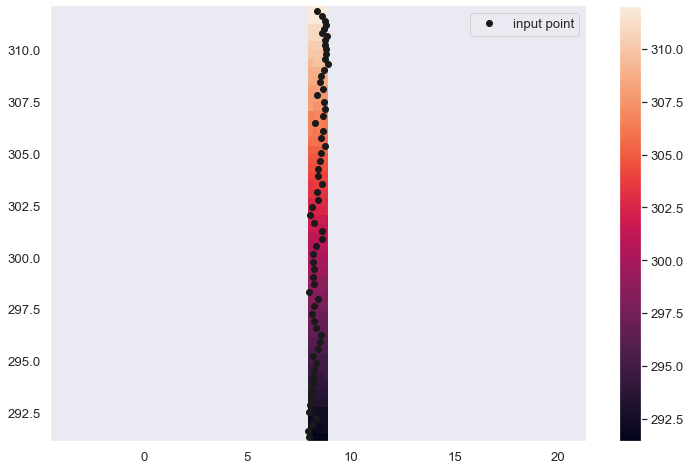

In [179]:
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
x = df_x_temp
y = df_x_ppm
z = np.hypot(x, y)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = NearestNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

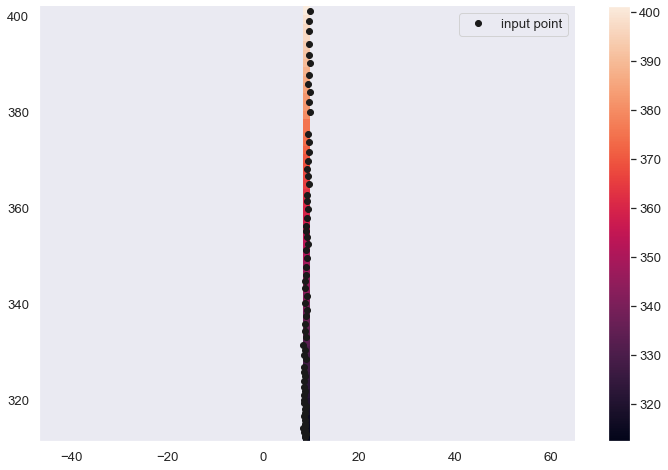

In [178]:
from scipy.interpolate import NearestNDInterpolator
import matplotlib.pyplot as plt
x = df_y_temp
y = df_y_ppm
z = np.hypot(x, y)
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = NearestNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

In [185]:
import pandas as pd
from math import sqrt
from scipy.stats import (
    norm,
    describe,
    ttest_1samp,
)
def ed_one_sample_z_test(vals, epsilons=[0], mu_0=0):
    """Calculate deltas from data and epsilons with the edz-test."""
    stats = describe(vals)
    
    def Z(x):
        return sqrt(stats.nobs / stats.variance) * (stats.mean - x)
    
    deltas = []
    for epsilon in epsilons:
        if stats.mean > (mu_0 + epsilon):
            z = Z(mu_0 + epsilon)
        elif stats.mean < (mu_0 - epsilon):
            z = Z(mu_0 - epsilon)
        else:
            z = 0
        delta = 2 * norm.cdf(-abs(z))
        deltas.append(delta)
    df = pd.DataFrame.from_dict(
        dict(delta=deltas, epsilon=epsilons)
    )
    return df

In [188]:
ed_one_sample_z_test(df_x_ppm,df_x_temp)

,delta,epsilon
0,0.0,7.954500
1,0.0,7.914917
2,0.0,8.090500
3,0.0,8.319000
4,0.0,7.971667
...,...,...
60,0.0,8.676917
61,0.0,8.797083
62,0.0,8.746750
63,0.0,8.586750


Lambda value used for Transformation: 3.8125876455352663


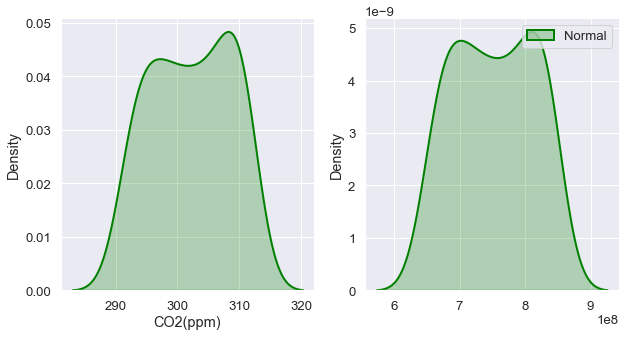

In [201]:
# Python3 code to show Box-cox Transformation 
# of non-normal data
# import modules
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
# generate non-normal data (exponential)
  
# transform training data & save lambda value
fitted_data_xp, fitted_lambda_xp = stats.boxcox(df_x_ppm)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df_x_ppm, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data_xp, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_xp}");

Lambda value used for Transformation: 1.4663997119368648


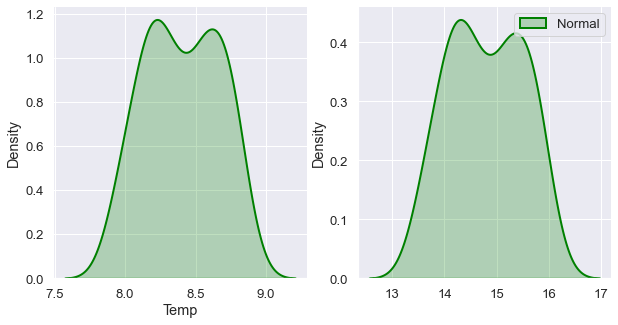

In [202]:
fitted_data_xt, fitted_lambda_xt = stats.boxcox(df_x_temp)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df_x_temp, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data_xt, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_xt}");

Lambda value used for Transformation: -3.231431927917861


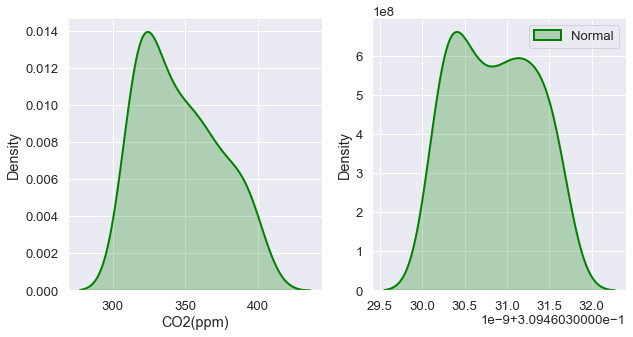

In [203]:
fitted_data_yp, fitted_lambda_yp = stats.boxcox(df_y_ppm)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df_y_ppm, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data_yp, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_yp}");

Lambda value used for Transformation: -4.493123495663707


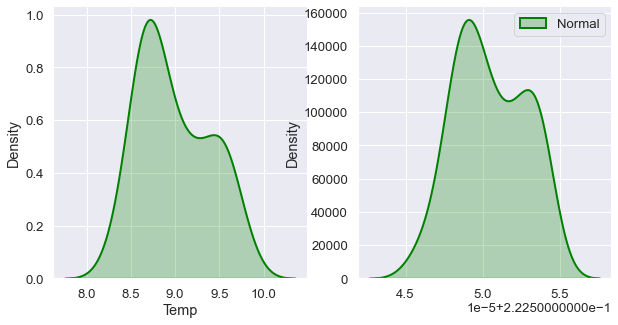

In [204]:
fitted_data_yt, fitted_lambda_yt = stats.boxcox(df_y_temp)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df_y_temp, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data_yt, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_yt}");

array([0.22254843, 0.22254852, 0.22255009, 0.22254795, 0.22254843,
       0.22254562, 0.22254918, 0.22254945, 0.22254918, 0.22254812,
       0.22254961, 0.22254927, 0.22254998, 0.22254675, 0.22254769,
       0.22254824, 0.22254895, 0.22254761, 0.22254821, 0.22254896,
       0.22254824, 0.22254748, 0.22255054, 0.22254722, 0.22254926,
       0.22254622, 0.22254994, 0.2225489 , 0.22254918, 0.22255073,
       0.22255175, 0.22254853, 0.222551  , 0.2225489 , 0.22254866,
       0.22254984, 0.22255081, 0.22255193, 0.22255039, 0.22255209,
       0.22255182, 0.22254986, 0.22255005, 0.22255106, 0.22255264,
       0.22255106, 0.22255194, 0.22255341, 0.22255234, 0.22255193,
       0.22255295, 0.22255361, 0.22255343, 0.22255253, 0.22255413,
       0.22255346, 0.22255424, 0.22255302, 0.22255334, 0.22255414,
       0.22255339, 0.22255335, 0.22255376, 0.22255361, 0.2225546 ])

Correlation Coefficient = 0.81
R-Value = 0.81


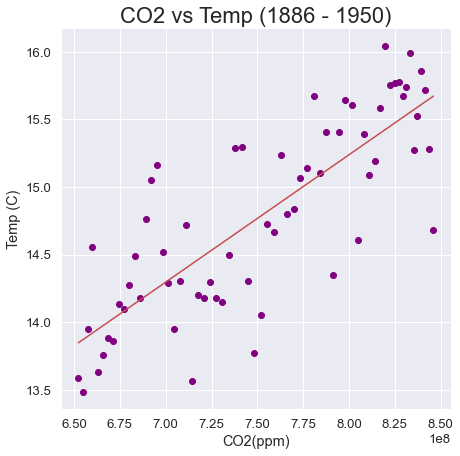

In [206]:
early_corr = round(st.pearsonr(fitted_data_xp, fitted_data_xt)[0], 2)
n_early = st.linregress(fitted_data_xp, fitted_data_xt)
print(f"Correlation Coefficient = {early_corr}\nR-Value = {round(n_early.rvalue,2)}")

line = n_early.slope * fitted_data_xp + n_early.intercept
line_eq = f"y = {round(n_early.slope, 2)}x + {round(n_early.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(fitted_data_xp, fitted_data_xt, marker="o", c= "purple")
plt.plot(fitted_data_xp, line, "r-")
plt.title(f"CO2 vs Temp (1886 - 1950)", fontsize=22)
plt.xlabel("CO2(ppm)")
plt.ylabel("Temp (C)")
plt.grid(True)
plt.annotate(line_eq, (295,8.8), fontsize=18, color="red");

Correlation Coefficient = 0.87
R-Value = 0.87


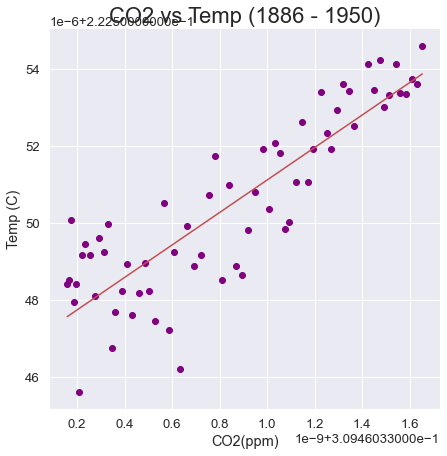

In [207]:
early_corr = round(st.pearsonr(fitted_data_yp, fitted_data_yt)[0], 2)
n_early = st.linregress(fitted_data_yp, fitted_data_yt)
print(f"Correlation Coefficient = {early_corr}\nR-Value = {round(n_early.rvalue,2)}")

line = n_early.slope * fitted_data_yp + n_early.intercept
line_eq = f"y = {round(n_early.slope, 2)}x + {round(n_early.intercept,2)}"

fig, ax = plt.subplots(figsize= (7,7))
ax.set_autoscale_on(True)
ax.scatter(fitted_data_yp, fitted_data_yt, marker="o", c= "purple")
plt.plot(fitted_data_yp, line, "r-")
plt.title(f"CO2 vs Temp (1886 - 1950)", fontsize=22)
plt.xlabel("CO2(ppm)")
plt.ylabel("Temp (C)")
plt.grid(True)
plt.annotate(line_eq, (295,8.8), fontsize=18, color="red");

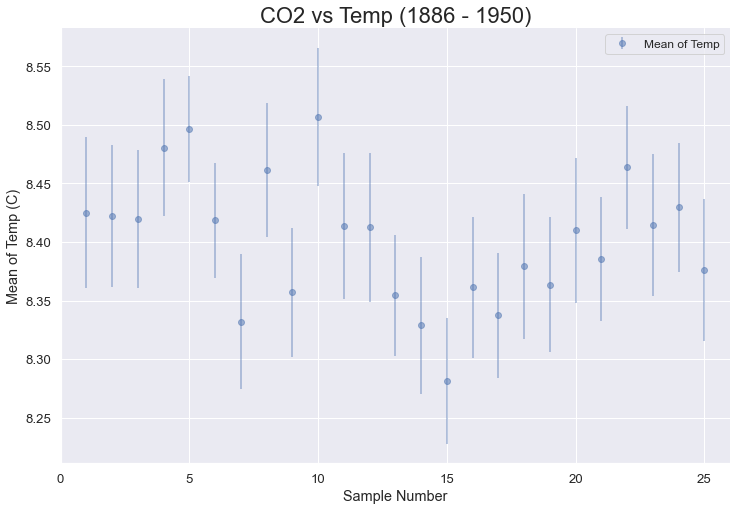

In [220]:
from scipy.stats import sem
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [df_x.sample(div) for x in range(0,nsamples)]

# Calculate means
means = [s.Temp.mean() for s in samples]
# Calculate standard error on means
sems = [sem(s.Temp) for s in samples]

# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of Temp")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Temp (C)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("CO2 vs Temp (1886 - 1950)", fontsize=22)
plt.show()

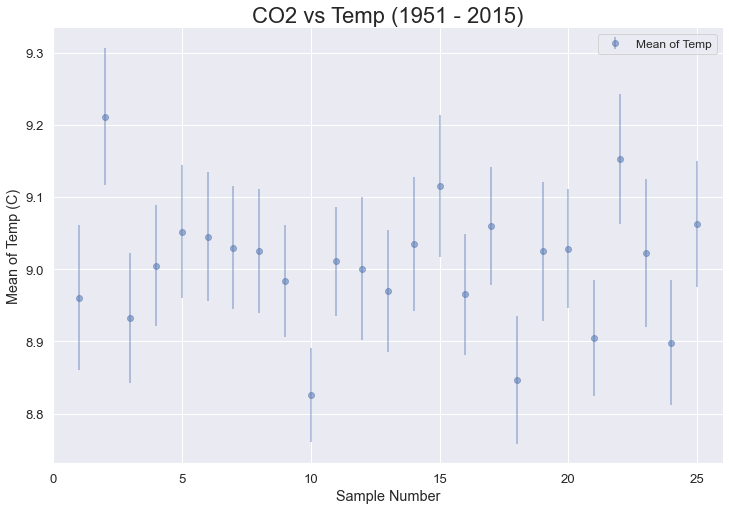

In [221]:
from scipy.stats import sem
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [df_y.sample(div) for x in range(0,nsamples)]

# Calculate means
means = [s.Temp.mean() for s in samples]
# Calculate standard error on means
sems = [sem(s.Temp) for s in samples]

# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(samples), 1)+1,means, yerr=sems, fmt="o", color="b",
            alpha=0.5, label="Mean of Temp")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Temp (C)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("CO2 vs Temp (1951 - 2015)", fontsize=22)
plt.show()

In [224]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
df_x.index.freq = df_x.index.inferred_freq
stlf = STLForecast(df_x, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="Year"))
stlf_res = stlf.fit()
forecast = stlf_res.forecast(24)
plt.plot(df_x)
plt.plot(forecast)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'